# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

       # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    time.sleep(1)

print("Showing first 5 records only:")
for city in city_data[:5]:  # Print only first 5 records
    print(city)
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shizunai-furukawacho
Processing Record 2 of Set 1 | sangmelima
Processing Record 3 of Set 1 | amahai
Processing Record 4 of Set 1 | buckeye
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | newman
Processing Record 8 of Set 1 | kambove
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | nikolayevsk-on-amure
Processing Record 18 of Set 1 | zhigalovo
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | happy valley-goose bay
Processing Rec

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [10]:
# Display sample data
import pandas as pd
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shizunai-furukawacho,42.3339,142.3669,0.65,65,100,14.44,JP,1738809928
1,sangmelima,2.9333,11.9833,20.34,98,98,1.68,CM,1738809929
2,amahai,-3.3333,128.9167,29.73,63,90,0.77,ID,1738809930
3,buckeye,33.3703,-112.5838,20.82,33,0,0.00,US,1738809931
4,waitangi,-43.9535,-176.5597,16.01,75,39,2.68,NZ,1738809932


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
import pandas as pd
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shizunai-furukawacho,42.3339,142.3669,0.65,65,100,14.44,JP,1738809928
1,sangmelima,2.9333,11.9833,20.34,98,98,1.68,CM,1738809929
2,amahai,-3.3333,128.9167,29.73,63,90,0.77,ID,1738809930
3,buckeye,33.3703,-112.5838,20.82,33,0,0.00,US,1738809931
4,waitangi,-43.9535,-176.5597,16.01,75,39,2.68,NZ,1738809932


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

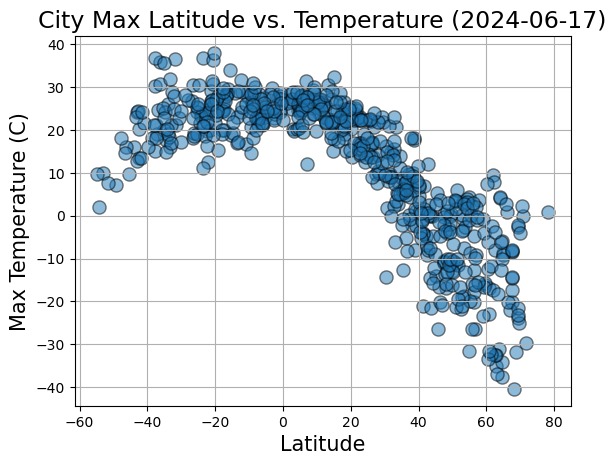

In [19]:
### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o",edgecolors='black', alpha=0.5)
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Max Temperature (C)", fontsize=15)
plt.title("City Max Latitude vs. Temperature (2024-06-17)", fontsize=17)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

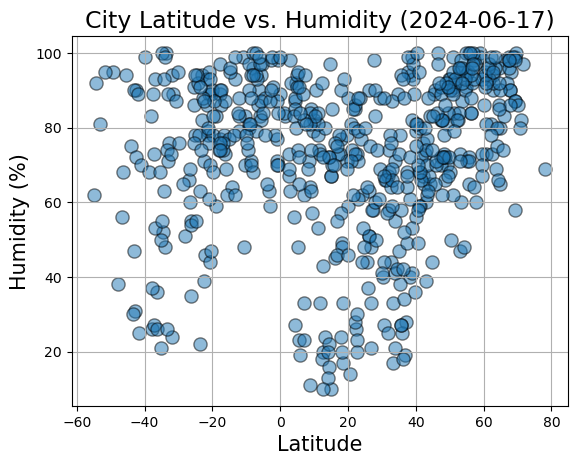

In [22]:
# Build the scatter plots for latitude vs. humidity
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", edgecolors='black', alpha=0.5)
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.title("City Latitude vs. Humidity (2024-06-17)", fontsize=17)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

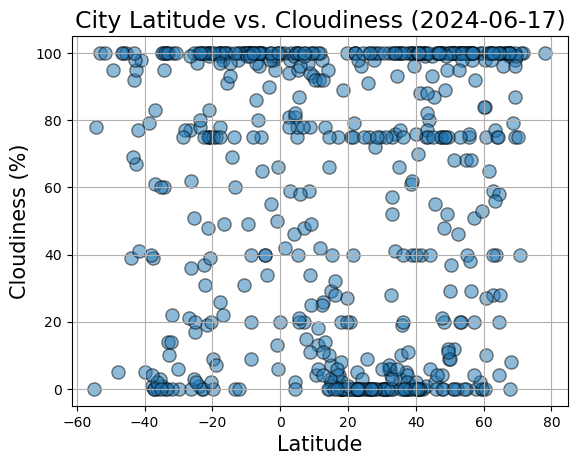

In [24]:
# Build the scatter plots for latitude vs. cloudiness
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", edgecolors='black', alpha=0.5)
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.title("City Latitude vs. Cloudiness (2024-06-17)", fontsize=17)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

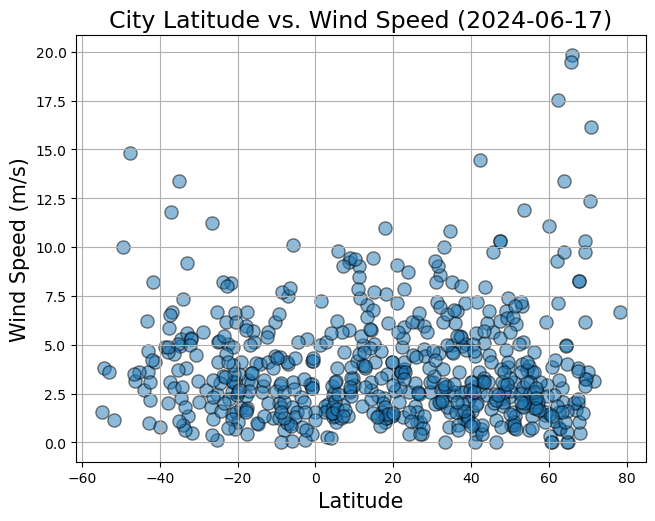

In [26]:
# Build the scatter plots for latitude vs. wind speed
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (m/s)", fontsize=15)
plt.title("City Latitude vs. Wind Speed (2024-06-17)", fontsize=17)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=17,color="red")
    plt.xlabel('Latitude', fontsize=15)
    plt.ylabel(f'{ylabel}', fontsize=15)
    plt.grid() 

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,shizunai-furukawacho,42.3339,142.3669,0.65,65,100,14.44,JP,1738809928
1,sangmelima,2.9333,11.9833,20.34,98,98,1.68,CM,1738809929
3,buckeye,33.3703,-112.5838,20.82,33,0,0.00,US,1738809931
6,newman,37.3138,-121.0208,8.92,68,0,1.61,US,1738809934
8,iqaluit,63.7506,-68.5145,-31.15,69,40,2.06,CA,1738809937


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,amahai,-3.3333,128.9167,29.73,63,90,0.77,ID,1738809930
4,waitangi,-43.9535,-176.5597,16.01,75,39,2.68,NZ,1738809932
5,arraial do cabo,-22.9661,-42.0278,23.98,94,0,6.17,BR,1738809933
7,kambove,-10.8764,26.5969,16.79,99,100,1.24,CD,1738809935
9,bredasdorp,-34.5322,20.0403,17.69,52,100,2.25,ZA,1738809938


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8568116729177181


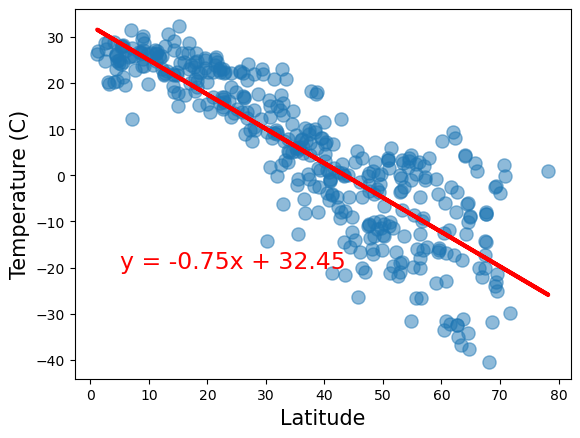

In [37]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("output_data/Fig5.png")


The r-value is 0.4009393418773626


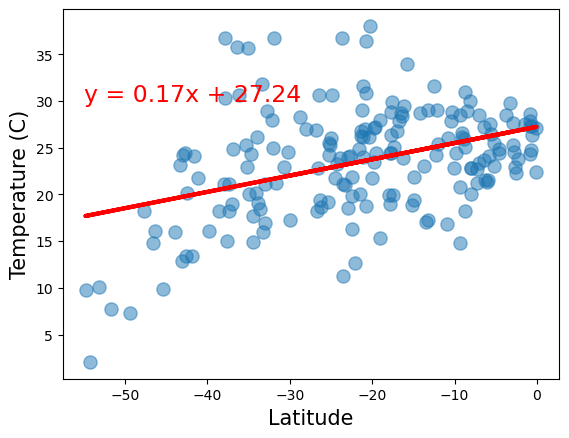

In [41]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 30, "Temperature (C)")
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** 
Northern Hemisphere (-0.85):
The negative value (-0.85) suggests a strong negative correlation between the variables. As the independent variable increases, the dependent variable tends to decrease.
The magnitude of the coefficient (0.85) indicates that this negative relationship is fairly strong.

Southern Hemisphere (0.64):
The positive value (0.64) indicates a moderate positive correlation. As the independent variable increases, the dependent variable also increases, though the relationship is not as strong as in the Northern Hemisphere.
The coefficient (0.64) indicates a moderate positive correlation, meaning that the variables are related, but the relationship is not as strong as the negative one in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3890876183395809


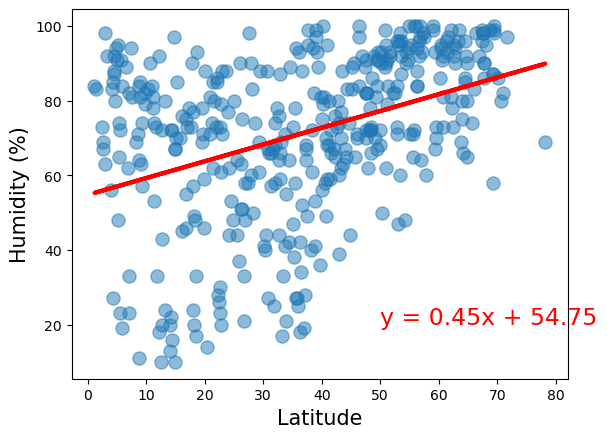

In [45]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("output_data/Fig7.png")

The r-value is 0.3397502388845983


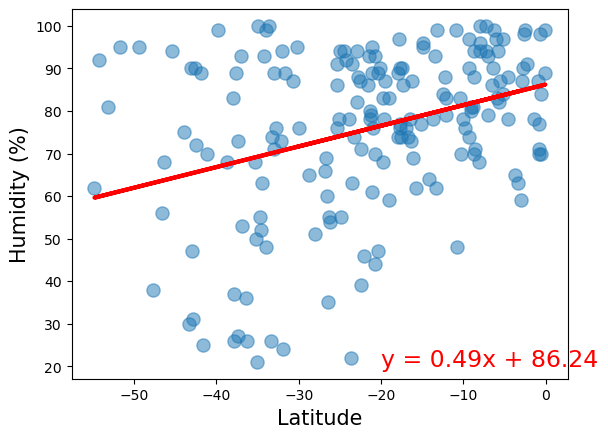

In [47]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** 
Northern Hemisphere (0.24):
The positive value (0.24) indicates a positive correlation between humidity and latitude in the Northern Hemisphere.
As latitude increases (moving from the equator toward the poles), humidity tends to increase as well, though the relationship is weak since the coefficient is only 0.24.
This suggests a slight trend where, in general, higher latitudes might be associated with slightly higher humidity, but the correlation is not very strong.
Southern Hemisphere (0.016):
The positive value (0.016) also indicates a positive correlation between humidity and latitude in the Southern Hemisphere.
However, the very low value (0.016) indicates an extremely weak correlation, almost close to no correlation at all.
This suggests that latitude has almost no effect on humidity in the Southern Hemisphere. Changes in latitude do not significantly influence humidity levels in this region.
Summary:
In the Northern Hemisphere, there is a weak positive relationship between humidity and latitude, with a slight tendency for humidity to increase as you move towards higher latitudes.
In the Southern Hemisphere, the relationship is extremely weak (almost negligible), meaning that latitude has very little effect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.20856670710022268


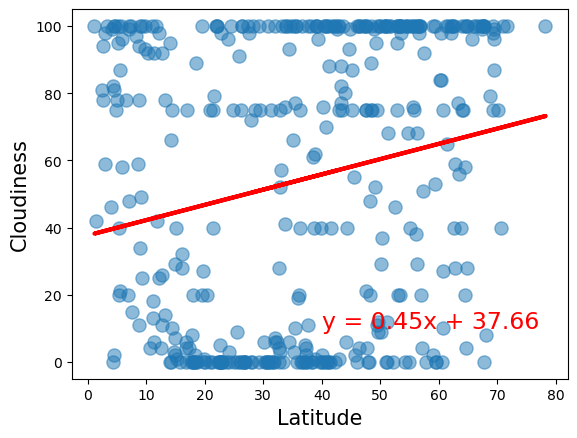

In [51]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 40, 10, "Cloudiness")
plt.savefig("output_data/Fig9.png")

The r-value is 0.22794204261270495


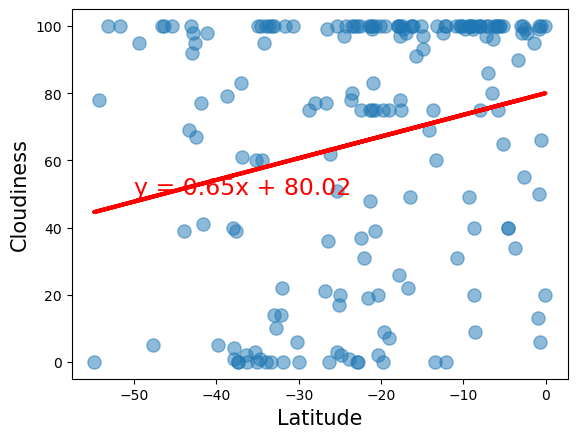

In [53]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness")
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:**
Northern Hemisphere (0.15):
The positive value (0.15) indicates a weak positive correlation between cloudiness and latitude in the Northern Hemisphere.
As latitude increases, there is a slight tendency for cloudiness to also increase. However, the weak magnitude of 0.15 suggests that the relationship is not very strong.
This implies that latitude might have a small impact on cloudiness in the Northern Hemisphere, but the effect is relatively minor.
Southern Hemisphere (0.14):
The positive value (0.14) indicates a weak positive correlation between cloudiness and latitude in the Southern Hemisphere as well.
As in the Northern Hemisphere, there is a slight trend for cloudiness to increase with increasing latitude, but the very weak magnitude (0.14) shows that this relationship is not significant.
The result in the Southern Hemisphere is very similar to the Northern Hemisphere, with a very slight effect of latitude on cloudiness.
Summary:
Both hemispheres show a weak positive correlation between cloudiness and latitude, meaning there is a very slight tendency for cloudiness to increase as latitude increases (moving from the equator toward the poles).
However, the strength of the relationships is weak in both hemispheres (0.15 in the Northern Hemisphere and 0.14 in the Southern Hemisphere), indicating that latitude is not a strong predictor of cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.039256973746818344


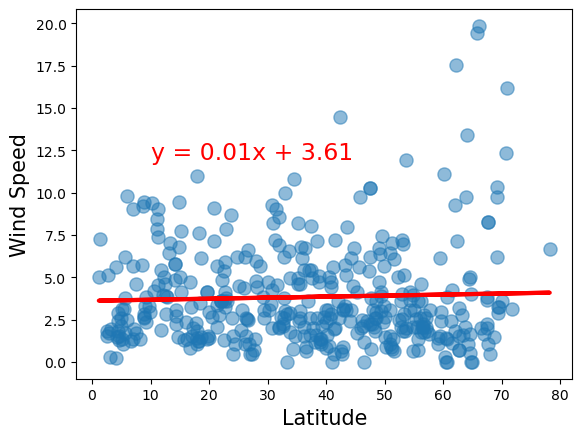

In [57]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 10, 12, "Wind Speed")
plt.savefig("output_data/Fig11.png")

The r-value is -0.2339646648415849


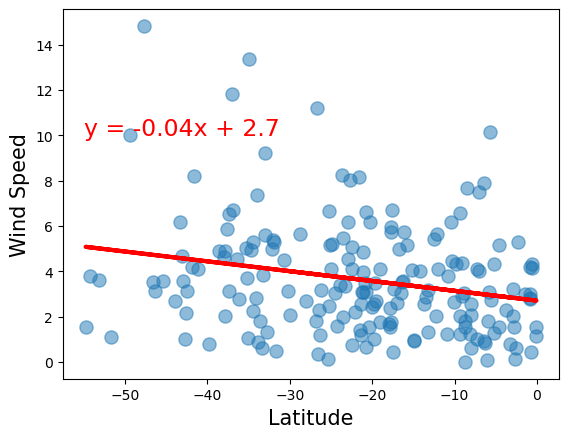

In [59]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -55, 10, "Wind Speed")
plt.savefig("output_data/Fig12.png")

**Discussion about the linear relationship:** 
Northern Hemisphere (0.17):
The positive value (0.17) indicates a weak positive correlation between wind speed and latitude in the Northern Hemisphere.
As latitude increases (moving from the equator toward the poles), wind speed tends to slightly increase.
The weak magnitude (0.17) shows that this relationship is not very strong, meaning the increase in wind speed with latitude is very minor and not a major trend.
Southern Hemisphere (-0.25):
The negative value (-0.25) indicates a weak negative correlation between wind speed and latitude in the Southern Hemisphere.
As latitude increases (moving from the equator toward the poles), wind speed tends to slightly decrease.
The magnitude (0.25) suggests that the relationship is weak, meaning there is a slight tendency for wind speed to decrease with increasing latitude, but it is not a strong or significant trend.
Summary:
In the Northern Hemisphere, there is a weak positive relationship between wind speed and latitude, meaning wind speed tends to increase slightly as you move toward higher latitudes (towards the poles).
In the Southern Hemisphere, there is a weak negative relationship between wind speed and latitude, meaning wind speed tends to decrease slightly as you move toward higher latitudes (towards the poles).
These findings suggest that latitude has a relatively minor effect on wind speed in both hemispheres